#### 패키지 

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential 
from keras.layers import Dense, Flatten

## MLP(다층 신경망) 
- MNIST 연습용 데이터셋 로드  
- matplotlib 라이브러리를 사용해 그 모양을 그려 보자. 

11490434/11490434 [==============================] - 4s 0us/step


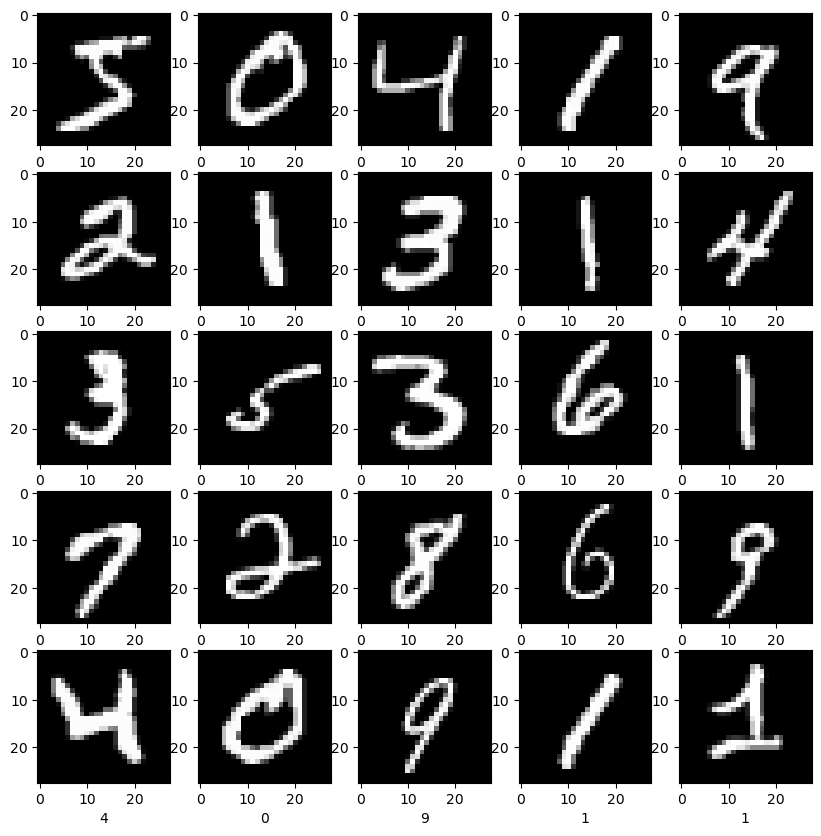

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# keras가 제공하는 mnist 데이터셋 로드 
mnist = keras.datasets.mnist

# 훈련 데이터와 테스트 데이터 로드 
(img_rows, img_cols) = (28, 28)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 몇 개의 샘플에 대해 그림 그리기 
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap=plt.cm.gray)
    plt.xlabel(y_train[i])
plt.show()

특성들은 모두 비슷한 크기의 값을 갖는 것이 바람직하다.  
픽셀 값들을 정규화하면 0에서 255 사이의 값이 0에서 1 사이의 값이 된다.  
이와 유사하게 Y값은 0~9의 숫자에서 one-hot encoding 벡터로 변환한다. 

In [5]:
from keras.utils import to_categorical

# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 데이터의 차원 보기 
print('Training X Dimensions: ', x_train.shape)
print('Training Y dimensions: ', y_train.shape)
print('Test X dimensions: ', x_test.shape)
print('Test Y dimensions: ', y_test.shape)

# 데이터 값을 0과 1 사이의 값으로 정규화 
x_train, x_test = x_train / 255.0, x_test / 255.0

Training X Dimensions:  (60000, 28, 28)
Training Y dimensions:  (60000, 10)
Test X dimensions:  (10000, 28, 28)
Test Y dimensions:  (10000, 10)


데이터셋을 정의하였으므로 이제 실제로 신경망을 구축하기 위한 코드를 살펴보자.  
우선 앞에서 봤던 간단한 MLP를 만들 것이다.  
입력층은 784인 벡터로 변환시켜 사용 : flatten 층을 사용해 수행 

512개의 뉴런을 갖는 은닉 층을 사용할 것  
한 층의 모든 뉴런들이 다음 층의 모든 뉴런들과 연결되는 밀집 층이다.  
이 층의 활성화 함수로는 relu 함수를 사용  

은닉층의 relu 활성화 함수는 신경망의 빠른 학습을 돕는다.  
출력층은 10개의 뉴런을 갖는 밀집 층이다.  
softmax 활성화 함수를 사용하여 모든 뉴런에 대한 확률값의 총계가 1이 된다. 

In [6]:
from keras.models import Sequential 
from keras.layers import Dense, Flatten

# 간단한 신경망을 구축 
model = Sequential()
model.add(
    Flatten(input_shape=(28, 28))
)
model.add(
    Dense(512, activation='relu')
)
model.add(
    Dense(10, activation='softmax')
)

# 모델에 대한 요약 보기 
model.summary()

# 모델을 위한 최적화 지점과 손실함수 정의 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


First weight layer size = (Layer1 Neurons + 1) * Layer2 Neurons = (784+1)*512 = 401920  
Second weight layer size = (Layer2 Neurons + 1) * Layer3 Neurons = (512+1)*10 = 5130  
Total weights of the Model = 401920 + 5130 = 407050

In [7]:
# 실제 훈련 
history = model.fit(x_train, y_train, epochs=1, validation_split=0.33)

2023-09-13 13:19:03.092372: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1257/1257 [==============================] - 2s 2ms/step - loss: 0.2382 - accuracy: 0.9293 - val_loss: 0.1384 - val_accuracy: 0.9586


In [10]:
# 테스트 데이터에서의 평가
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 883us/step - loss: 0.1243 - accuracy: 0.9637


[0.12429200112819672, 0.963699996471405]

은닉 층의 수와 각 은닉 층의 뉴런 수는 하이퍼파라미터이다.  
이것들은 학습되는 것이 아니지만, 조정하면 모델의 예측이 더 좋아질 수 있다. 

코드와 결과에 대해 몇 가지 주목할 점은 다음과 같다.  
- Adam Optimizer : 전통적인 경사하강법의 변종들 
- Categorical Crossentropy: 다중 클래스 분류기에 필요한 손실 함수 
    - 단 한번의 epoch이지만, 데이터가 좋아서 좋은 결과를 얻었다. 
    - 현실에서는 데이터의 품질이 좋지 않을 확률이 높아 데이터 정제 및 다른 선처리 과정 필요 

- 검증용 데이터 33%:
    - 훈련을 위해서는 훈련 데이터셋의 67%만 사용 
    - 나머지 33%를 가지고 모델 검증 

- 훈련 정확도 및 훈련 손실, 검증 정확도 및 검증 손실을 보여줌 